In [3]:
import pandas as pd  # requires: pip install pandas
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",  # use "cpu" for CPU inference and "mps" for Apple Silicon
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# forecast shape: [num_series, num_samples, prediction_length]
forecast = pipeline.predict(
    context=torch.tensor(df["#Passengers"]),
    prediction_length=12,
    num_samples=20,
)

In [4]:
print(ChronosPipeline.predict.__doc__)


        Get forecasts for the given time series.

        Parameters
        ----------
        context
            Input series. This is either a 1D tensor, or a list
            of 1D tensors, or a 2D tensor whose first dimension
            is batch. In the latter case, use left-padding with
            ``torch.nan`` to align series of different lengths.
        prediction_length
            Time steps to predict. Defaults to what specified
            in ``self.model.config``.
        num_samples
            Number of sample paths to predict. Defaults to what
            specified in ``self.model.config``.
        temperature
            Temperature to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        top_k
            Top-k parameter to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        top_p
            Top-p parameter to use for generating sample tokens.
            

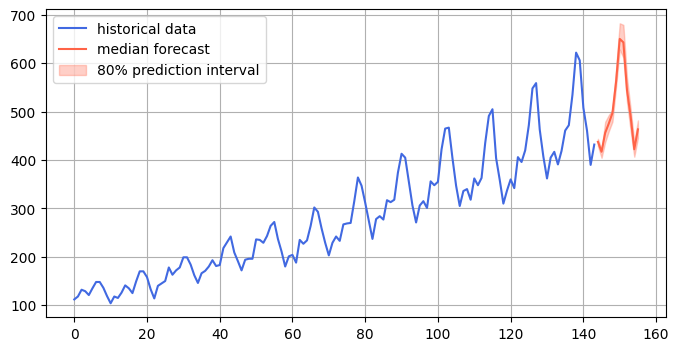

In [7]:
import matplotlib.pyplot as plt  # requires: pip install matplotlib
import numpy as np

forecast_index = range(len(df), len(df) + 12)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [8]:
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",
    device_map="cuda",
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
embeddings, tokenizer_state = pipeline.embed(context)

In [9]:
context

tensor([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
        141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163,
        172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218,
        230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243, 264, 272,
        237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229,
        203, 229, 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
        284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306, 315, 301,
        356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348,
        363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
        548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606,
        508, 461, 390, 432])

In [10]:
embeddings

tensor([[[ 0.0405,  0.0236,  0.0098,  ...,  0.0154,  0.0234, -0.0018],
         [ 0.0299, -0.0312,  0.0378,  ...,  0.0344,  0.0176, -0.0016],
         [-0.0240,  0.0167,  0.0408,  ...,  0.0486,  0.0054,  0.0200],
         ...,
         [ 0.0564,  0.0229,  0.0063,  ..., -0.1074,  0.0009, -0.0070],
         [-0.0325, -0.0322, -0.0061,  ..., -0.0713, -0.0034,  0.0276],
         [ 0.0071,  0.0172, -0.0176,  ..., -0.0037, -0.0123,  0.0309]]],
       dtype=torch.bfloat16)

In [11]:
tokenizer_state

tensor([280.2986])

In [12]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
